In [1]:
import yfinance as yf
import pandas as pd
import pandas_ta as pta
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
plt.style.use('seaborn')

# Define the date range
start_date = '2019-01-01'
end_date = '2021-12-31'
interval = '15'
# Fetch NAS100 data from Yahoo Finance (NASDAQ Composite)
df_train = yf.download('^IXIC', start=start_date, end=end_date)

# Save the data as a CSV file
df_train.to_csv('nas100.csv')


start_date_1 = '2022-01-01'
end_date_1 = '2022-12-31'
df_test = yf.download('^IXIC', start = start_date_1, end = end_date_1)
df_test.to_csv('nas100_test.csv')

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('nas100.csv')
df_test = pd.read_csv('nas100_test.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,6506.910156,6693.709961,6506.879883,6665.939941,6665.939941,2261800000
1,2019-01-03,6584.770020,6600.209961,6457.129883,6463.500000,6463.500000,2631550000
2,2019-01-04,6567.140137,6760.689941,6554.240234,6738.859863,6738.859863,2596150000
3,2019-01-07,6757.529785,6855.600098,6741.399902,6823.470215,6823.470215,2523450000
4,2019-01-08,6893.439941,6909.580078,6795.859863,6897.000000,6897.000000,2407340000
...,...,...,...,...,...,...,...
751,2021-12-23,15544.790039,15697.980469,15528.910156,15653.370117,15653.370117,3935010000
752,2021-12-27,15696.830078,15871.400391,15696.830078,15871.259766,15871.259766,3743920000
753,2021-12-28,15895.200195,15901.469727,15757.070312,15781.719727,15781.719727,3648500000
754,2021-12-29,15794.919922,15821.809570,15679.849609,15766.219727,15766.219727,3714380000


In [3]:
help(pta.ichimoku)

Help on function ichimoku in module pandas_ta.overlap.ichimoku:

ichimoku(high, low, close, tenkan=None, kijun=None, senkou=None, include_chikou=True, offset=None, **kwargs)
    Ichimoku Kinkō Hyō (ichimoku)
    
    Developed Pre WWII as a forecasting model for financial markets.
    
    Sources:
        https://www.tradingtechnologies.com/help/x-study/technical-indicator-definitions/ichimoku-ich/
    
    Calculation:
        Default Inputs:
            tenkan=9, kijun=26, senkou=52
        MIDPRICE = Midprice
        TENKAN_SEN = MIDPRICE(high, low, close, length=tenkan)
        KIJUN_SEN = MIDPRICE(high, low, close, length=kijun)
        CHIKOU_SPAN = close.shift(-kijun)
    
        SPAN_A = 0.5 * (TENKAN_SEN + KIJUN_SEN)
        SPAN_A = SPAN_A.shift(kijun)
    
        SPAN_B = MIDPRICE(high, low, close, length=senkou)
        SPAN_B = SPAN_B.shift(kijun)
    
    Args:
        high (pd.Series): Series of 'high's
        low (pd.Series): Series of 'low's
        close (pd.Serie

In [4]:
ichimoku = pta.ichimoku(high=df['High'], low=df['Low'], close=df['Close'], tenkan=None, kijun=None, senkou=None, offset=None)
display(ichimoku)

(            ISA_9        ISB_26         ITS_9        IKS_26       ICS_26
 0             NaN           NaN           NaN           NaN  7298.200195
 1             NaN           NaN           NaN           NaN  7307.899902
 2             NaN           NaN           NaN           NaN  7414.620117
 3             NaN           NaN           NaN           NaN  7420.379883
 4             NaN           NaN           NaN           NaN  7426.950195
 ..            ...           ...           ...           ...          ...
 751  15523.014648  15117.540039  15279.010254  15536.135254          NaN
 752  15530.584717  15117.540039  15365.720215  15536.135254          NaN
 753  15583.704834  15117.540039  15380.754883  15536.135254          NaN
 754  15654.800049  15151.405273  15380.754883  15536.135254          NaN
 755  15700.355225  15196.960449  15380.754883  15380.754883          NaN
 
 [756 rows x 5 columns],
             ISA_9        ISB_26
 756  15761.735107  15196.960449
 757  15759.210205 

In [5]:
type(ichimoku)

tuple

In [6]:
ichi=ichimoku[0]
ichi_1=ichimoku[1]

In [7]:
df['tenkan'] = ichi['ITS_9']
df['kijun'] = ichi['IKS_26']
df['span_a'] = ichi['ISA_9']
df['span_b'] = ichi['ISB_26']
df['chiko'] = ichi['ICS_26']
df

,Date,Open,High,Low,Close,Adj Close,Volume,tenkan,kijun,span_a,span_b,chiko
0,2019-01-02,6506.910156,6693.709961,6506.879883,6665.939941,6665.939941,2261800000,NaN,NaN,NaN,NaN,7298.200195
1,2019-01-03,6584.770020,6600.209961,6457.129883,6463.500000,6463.500000,2631550000,NaN,NaN,NaN,NaN,7307.899902
2,2019-01-04,6567.140137,6760.689941,6554.240234,6738.859863,6738.859863,2596150000,NaN,NaN,NaN,NaN,7414.620117
3,2019-01-07,6757.529785,6855.600098,6741.399902,6823.470215,6823.470215,2523450000,NaN,NaN,NaN,NaN,7420.379883
4,2019-01-08,6893.439941,6909.580078,6795.859863,6897.000000,6897.000000,2407340000,NaN,NaN,NaN,NaN,7426.950195
...,...,...,...,...,...,...,...,...,...,...,...,...
751,2021-12-23,15544.790039,15697.980469,15528.910156,15653.370117,15653.370117,3935010000,15279.010254,15536.135254,15523.014648,15117.540039,NaN
752,2021-12-27,15696.830078,15871.400391,15696.830078,15871.259766,15871.259766,3743920000,15365.720215,15536.135254,15530.584717,15117.540039,NaN
753,2021-12-28,15895.200195,15901.469727,15757.070312,15781.719727,15781.719727,3648500000,15380.754883,15536.135254,15583.704834,15117.540039,NaN
754,2021-12-29,15794.919922,15821.809570,15679.849609,15766.219727,15766.219727,3714380000,15380.754883,15536.135254,15654.800049,15151.405273,NaN


In [8]:
days = 200
date = df['Date'].tail(days)
price = df['Close'].tail(days)
tenkan = df['tenkan'].tail(days)
kijun = df['kijun'].tail(days)
span_a = df['span_a'].tail(days)
span_b = df['span_b'].tail(days)
chiko = df['chiko'].tail(days)

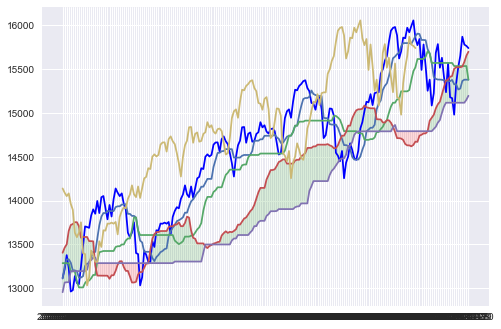

In [9]:
#plot
plt.plot_date(date, price, linestyle='solid', fmt='b', marker=None, label="NAS100")
plt.plot(date, tenkan, label="Tenkan")
plt.plot(date, kijun, label="kijun")
plt.plot(date, span_a, label="Span_A")
plt.plot(date, span_b, label="Span_B")
plt.plot(date, chiko, label="Chikou")

plt.fill_between(date, span_a, span_b,
                where=(span_a >= span_b), color='green', alpha=0.15,
                label='Bullish')
plt.fill_between(date, span_a, span_b,
                where=(span_a <= span_b), color='red', alpha=0.15,
                label='Bearish')
plt.xlabel=('Date')
plt.ylabel=('Price')
plt.show()

In [10]:
def trade_cond(dataframe):
    signal = []
    
    for i in range(len(dataframe)):
        if (dataframe['Close'][i] > dataframe['tenkan'][i]) & (dataframe['Close'][i] > dataframe['kijun'][i]):
            signal.append('long')
        elif (dataframe['Close'][i] < dataframe['tenkan'][i]) & (dataframe['Close'][i] < dataframe['kijun'][i]):
            signal.append('short')
        else:
            signal.append('neutral')
            
    return signal

In [11]:
df['position'] = trade_cond(df)
df

,Date,Open,High,Low,Close,Adj Close,Volume,tenkan,kijun,span_a,span_b,chiko,position
0,2019-01-02,6506.910156,6693.709961,6506.879883,6665.939941,6665.939941,2261800000,NaN,NaN,NaN,NaN,7298.200195,neutral
1,2019-01-03,6584.770020,6600.209961,6457.129883,6463.500000,6463.500000,2631550000,NaN,NaN,NaN,NaN,7307.899902,neutral
2,2019-01-04,6567.140137,6760.689941,6554.240234,6738.859863,6738.859863,2596150000,NaN,NaN,NaN,NaN,7414.620117,neutral
3,2019-01-07,6757.529785,6855.600098,6741.399902,6823.470215,6823.470215,2523450000,NaN,NaN,NaN,NaN,7420.379883,neutral
4,2019-01-08,6893.439941,6909.580078,6795.859863,6897.000000,6897.000000,2407340000,NaN,NaN,NaN,NaN,7426.950195,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2021-12-23,15544.790039,15697.980469,15528.910156,15653.370117,15653.370117,3935010000,15279.010254,15536.135254,15523.014648,15117.540039,NaN,long
752,2021-12-27,15696.830078,15871.400391,15696.830078,15871.259766,15871.259766,3743920000,15365.720215,15536.135254,15530.584717,15117.540039,NaN,long
753,2021-12-28,15895.200195,15901.469727,15757.070312,15781.719727,15781.719727,3648500000,15380.754883,15536.135254,15583.704834,15117.540039,NaN,long
754,2021-12-29,15794.919922,15821.809570,15679.849609,15766.219727,15766.219727,3714380000,15380.754883,15536.135254,15654.800049,15151.405273,NaN,long


In [12]:
def crossover(dataframe):
    
    lc = [] #longcrossover
    sc = [] #shortcrossover
    # a marker to know whether the previous point is a crossover or not
    m = 0
    
    for i in range(len(dataframe)):
        if dataframe['tenkan'][i] > dataframe['kijun'][i]:
            if (m != 1):
                lc.append(dataframe['Close'][i])
                sc.append(np.NaN)
                marker = 1
            else:
                lc.append(np.NaN)
                sc.append(np.NaN)
                
        elif dataframe['tenkan'][i] < dataframe['kijun'][i]:
            if (m != 1):
                sc.append(dataframe['Close'][i])
                lc.append(np.NaN)
                marker = 1
            else:
                lc.append(np.NaN)
                sc.append(np.NaN)
                
        else:
            lc.append(np.NaN)
            sc.append(np.NaN)
            
    return lc,sc

In [13]:
co = crossover(df)

In [14]:
df['long_crossover'] = co[0]
df['short_crossover'] = co[1]
df

,Date,Open,High,Low,Close,Adj Close,Volume,tenkan,kijun,span_a,span_b,chiko,position,long_crossover,short_crossover
0,2019-01-02,6506.910156,6693.709961,6506.879883,6665.939941,6665.939941,2261800000,NaN,NaN,NaN,NaN,7298.200195,neutral,NaN,NaN
1,2019-01-03,6584.770020,6600.209961,6457.129883,6463.500000,6463.500000,2631550000,NaN,NaN,NaN,NaN,7307.899902,neutral,NaN,NaN
2,2019-01-04,6567.140137,6760.689941,6554.240234,6738.859863,6738.859863,2596150000,NaN,NaN,NaN,NaN,7414.620117,neutral,NaN,NaN
3,2019-01-07,6757.529785,6855.600098,6741.399902,6823.470215,6823.470215,2523450000,NaN,NaN,NaN,NaN,7420.379883,neutral,NaN,NaN
4,2019-01-08,6893.439941,6909.580078,6795.859863,6897.000000,6897.000000,2407340000,NaN,NaN,NaN,NaN,7426.950195,neutral,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2021-12-23,15544.790039,15697.980469,15528.910156,15653.370117,15653.370117,3935010000,15279.010254,15536.135254,15523.014648,15117.540039,NaN,long,NaN,15653.370117
752,2021-12-27,15696.830078,15871.400391,15696.830078,15871.259766,15871.259766,3743920000,15365.720215,15536.135254,15530.584717,15117.540039,NaN,long,NaN,15871.259766
753,2021-12-28,15895.200195,15901.469727,15757.070312,15781.719727,15781.719727,3648500000,15380.754883,15536.135254,15583.704834,15117.540039,NaN,long,NaN,15781.719727
754,2021-12-29,15794.919922,15821.809570,15679.849609,15766.219727,15766.219727,3714380000,15380.754883,15536.135254,15654.800049,15151.405273,NaN,long,NaN,15766.219727


In [15]:
def create_signal(dataframe):
    s = []
    
    for i in range(len(dataframe)):
        if pd.notnull(dataframe['long_crossover'][i]) & (dataframe['position'][i] == 'long'):
            s.append('buy')
            
        elif pd.notnull(dataframe['short_crossover'][i]) & (dataframe['position'][i] == 'short'):
            s.append('sell')
            
        else:
            s.append('hold')
            
    return s
                                                        

In [16]:
df['signal'] = create_signal(df)
df.tail(50)

,Date,Open,High,Low,Close,Adj Close,Volume,tenkan,kijun,span_a,span_b,chiko,position,long_crossover,short_crossover,signal
706,2021-10-20,15160.000000,15178.389648,15071.150391,15121.679688,15121.679688,4117050000,14809.994629,14693.595215,15059.585205,14791.050293,15491.660156,long,15121.679688,NaN,buy
707,2021-10-21,15104.799805,15222.250000,15094.139648,15215.700195,15215.700195,4961860000,14831.924805,14701.970215,15053.680176,14791.050293,15782.830078,long,15215.700195,NaN,buy
708,2021-10-22,15158.070312,15193.009766,15021.019531,15090.200195,15090.200195,5775770000,14831.924805,14701.970215,15053.680176,14791.050293,15537.690430,long,15090.200195,NaN,buy
709,2021-10-25,15142.919922,15259.629883,15070.750000,15226.709961,15226.709961,5750200000,14865.754883,14720.660156,15053.680176,14791.050293,15254.049805,long,15226.709961,NaN,buy
710,2021-10-26,15317.500000,15384.000000,15198.230469,15235.709961,15235.709961,7173230000,15041.759766,14782.845215,14929.255127,14791.050293,15381.320312,long,15235.709961,NaN,buy
711,2021-10-27,15276.000000,15364.540039,15235.839844,15235.839844,15235.839844,6130110000,15108.640137,14782.845215,14927.262695,14791.050293,15085.469727,long,15235.839844,NaN,buy
712,2021-10-28,15304.740234,15452.299805,15290.309570,15448.120117,15448.120117,5714890000,15142.790039,14816.995117,14926.535156,14791.050293,15225.150391,long,15448.120117,NaN,buy
713,2021-10-29,15323.290039,15504.120117,15323.290039,15498.389648,15498.389648,5338290000,15262.569824,14842.905273,14893.027832,14791.050293,15686.919922,long,15498.389648,NaN,buy
714,2021-11-01,15541.259766,15598.950195,15470.820312,15595.919922,15595.919922,5273950000,15309.984863,14890.320312,14890.542725,14791.050293,15786.990234,long,15595.919922,NaN,buy
715,2021-11-02,15583.980469,15656.599609,15569.269531,15649.599609,15649.599609,5129370000,15338.809570,14919.145020,14917.270264,14791.050293,15517.370117,long,15649.599609,NaN,buy


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

# Here, we're using columns: tenkan_sen, kijun_sen, senkou_span_a, senkou_span_b, chikou_span
df.dropna()
# Define features and target
features = df[['tenkan', 'kijun', 'span_a', 'span_b', 'chiko']]
target = df['signal']  # Binary: 1 if price went up, 0 if price went down


def train_and_evaluate(features, targets, model_type='linear_regression'):
    X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)
    
    if model_type == 'linear_regression':
        model = LinearRegression()
    elif model_type == 'random_forest_classifier':
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model_type == 'support_vector_machine':
        model = SVC(kernel='linear', C=1.0)
    else:
        raise ValueError("Invalid model type. Choose from 'linear_regression', 'random_forest_classifier', or 'support_vector_machine'")
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    if model_type in ['random_forest_classifier', 'support_vector_machine']:
        score = accuracy_score(y_test, predictions)
    elif model_type == 'linear_regression':
        score = mean_squared_error(y_test, predictions)
    
    return score

# Example usage
# Assuming 'X' is your feature matrix and 'y' is your target vector

# Calculate and print accuracy for Random Forest Classifier
#rf_accuracy = train_and_evaluate(features, target, model_type='random_forest_classifier')
#print(f"Random Forest Classifier Accuracy: {rf_accuracy:.2f}")

# Calculate and print accuracy for Support Vector Machine
#svm_accuracy = train_and_evaluate(features, target, model_type='support_vector_machine')
#print(f"SVM Classifier Accuracy: {svm_accuracy:.2f}")

# Calculate and print mean squared error for Linear Regression
linear_mse = train_and_evaluate(features, target, model_type='linear_regression')
print(f"Linear Regression MSE: {linear_mse:.2f}")